In [3]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')

In [4]:
data_2 = pd.read_csv('../output/train_outputs.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()

,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_63,Subcar_64,Label
0,1625554196,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592,0
1,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592,0
2,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592,0
3,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592,0
4,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592,0


In [5]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    X_data, target,  test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)

X_train.shape:  (876, 64)
X_test.shape:  (219, 64)


In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)

tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg4 = DecisionTreeRegressor(random_state=42, max_depth=12)


tree_reg1.fit(x_train, y_train)
tree_reg2.fit(x_train, y_train)
tree_reg3.fit(x_train, y_train)
tree_reg4.fit(x_train, y_train)

train_accuracy1 = tree_reg1.score(x_train, y_train)
test_accuracy1 = tree_reg1.score(x_test, y_test)

train_accuracy2 = tree_reg2.score(x_train, y_train)
test_accuracy2 = tree_reg2.score(x_test, y_test)

train_accuracy3 = tree_reg3.score(x_train, y_train)
test_accuracy3 = tree_reg3.score(x_test, y_test)

train_accuracy4 = tree_reg4.score(x_train, y_train)
test_accuracy4 = tree_reg4.score(x_test, y_test)

print('The training and testing scores of model 1: {} and {},\nThe training and testing scores of model 2: {} and {},\nThe training and testing scores of model 3: {} and {},\nThe training and testing scores of model 4: {} and {}'.format(
      train_accuracy1, test_accuracy1, train_accuracy2, test_accuracy2, train_accuracy3, test_accuracy3, train_accuracy4, test_accuracy4))


The training and testing scores of model 1: 1.0 and 1.0,
The training and testing scores of model 2: 1.0 and 1.0,
The training and testing scores of model 3: 1.0 and 1.0,
The training and testing scores of model 4: 1.0 and 1.0


c:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
c:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

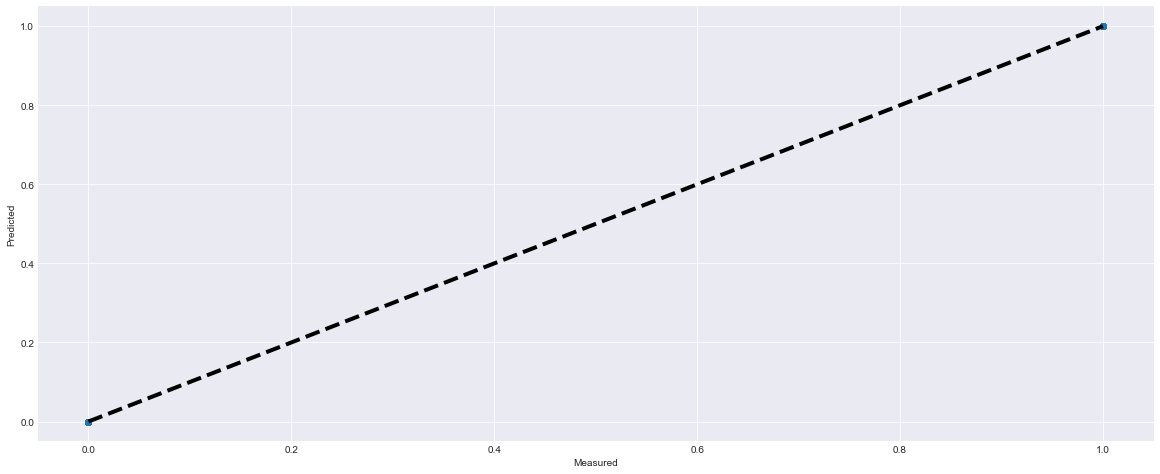

In [9]:
from sklearn import linear_model
lr = linear_model.LinearRegression(normalize=True)
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_data, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
